<h1>HW3</h1>

# Question 1
### (Bayes Theorem) Read the following example and complete the exercises 

Trolls Under the Bridge
1. Trolls(T) are bad
2. Gnomes(G) are benign
3. Every bridge has 5 creatures under it

Below are the probabilities of what creatures live under a bridge:
1. TTGGG: 20% (E1)
2. TGGGG: 20% (E2)
3. GGGGG: 60% (E3)

A knight is approaching a bridge and he wants to know his chance of crossing the bridge safely.

### 1.1 

#### What is the chance of the knight crossing the bridge safely?


The chance of the knight crossing the bridge safely is 60%, because this is the probability that only gnomes are under the bridge without any trolls (GGGGG).

### 1.2

#### Before crossing a bridge, a knight captures a troll. “I now have an 80% chance of crossing safely,” he reasons, “since only the case 20% had TTGGG (E1) now have TGGG is still a threat.”

#### Do you agree with him? Why?

I do not agree with the knight. The knight originally only had a 60% chance of crossing safely before coming into contact with troll. In order to calculate the probability that the knight will cross safely given he encountered a troll, the posterior probability must be calculated. The knight claiming his 80% chance of safe crossing is not at all conditioned on previously seen data. Therefore, it is inaccurate.

### 1.3

#### Now he wants to use Bayes' theorem to calculate his chance of crossing safely given a troll captured 

\begin{equation*}
P(A|B) = \frac{P(B|A)P(A)}{P(B)} \\
P(A|B): Posteior \\
P(B|A): Likelihood \\
P(A): Prior \\
P(B): Marginal Probability \\
\end{equation*}

#### Given the three events, E1, E2, and E3, which two of the three events does the knight need to consider after a troll was captured?

After a troll is captured, the knight must consider both events E1 and E2.

### 1.4

#### Use Bayes' theorem to calculate the probability of the two events in 1.3 (separately) given the troll was captured. 

Probability of one event given a troll captured: 

In [21]:
# P(E1|troll captured)= (P(troll captured|E1)* P(E1)) / (P(troll captured|E1)* P(E1) +P(troll captured|E2) * P(E2))
# P(troll captured|E2) = 1/5
# P(E2) = 1/5
# P(troll captured|E1) = 2/5
# P(E1) = 1/5
P=((.4*.2)/((.4*.2)+(.2*.2)))

0.6666666666666666

Probability of the other event given a troll captured: 

In [22]:
# P(E2|troll captured)=(P(troll captured|E2)* P(E2)) / (P(troll captured|E2)* P(E2) +P(troll captured|E1) * P(E1))
# P(troll captured|E2) = 1/5
# P(E2) = 1/5
# P(troll captured|E1) = 2/5
# P(E1) = 1/5
P=((.2*.2)/((.2*.2)+(.4*.2)))

0.3333333333333333

### 1.5

#### What is the chance of the knight crossing safely?

The chance of the knight crossing safely is 1/3.

#### Now looking back to 1.1, the probabilities were changed after assimilating data! 

# Question 2
### (Polynomial Fitting) Read the following example and complete the exercises 

Biological data always comes with errors that influence the intepretation of the data significantly. In this question, we will simulate data and see how noises affect the parameter estimation.

In [2]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random"])

    Updating registry at `C:\Users\julia\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\julia\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\julia\.julia\environments\v1.8\Manifest.toml`


In [ ]:
import Distributions as di
import Plots
import Polynomials
import Random

### 2.1

1. Generate the independent variable x ranging from -10 to 10 with an increment of 1
2. Generate the dependent variable y_true using the equation y_true = x^2 + 3x - 2


In [56]:
x=collect(-10:1:10)
y_true=x.^2 .+3x .-2

21-element Vector{Int64}:
  68
  52
  38
  26
  16
   8
   2
  -2
  -4
  -4
  -2
   2
   8
  16
  26
  38
  52
  68
  86
 106
 128

### 2.2

1. Generate the Guassian noises with zero mean and a standard deviation of 10

2. Add the noises to y_true to obtain y_observed


In [57]:
using Random, Distributions
d = Normal(0,10)
noise=rand(d,length(x))
y_observed = y_true .+ noise

21-element Vector{Float64}:
  72.28244881704119
  47.01367954433652
  27.51788850252399
  19.96273953453126
  11.849829795591194
   8.829024703233166
  23.25034310696894
  -5.421493546807664
  -6.861632987650956
 -13.2416396628455
  -2.697333039509994
  14.158434012405216
  13.227577363792815
  11.066130206927015
  27.885104810751535
  47.939553114893535
  50.93424889985741
  62.90998056516615
  88.7515814104575
 102.53493038661288
 114.0298594190082

### 2.3

#### Fit the data (x, y_observed) with a second order polynomial. 

1. Make a scatter plot of y_observed along x
2. Plot a line of y_true along x on the scatter plot
3. Plot a line of the fitted polynomial along x on the same plot

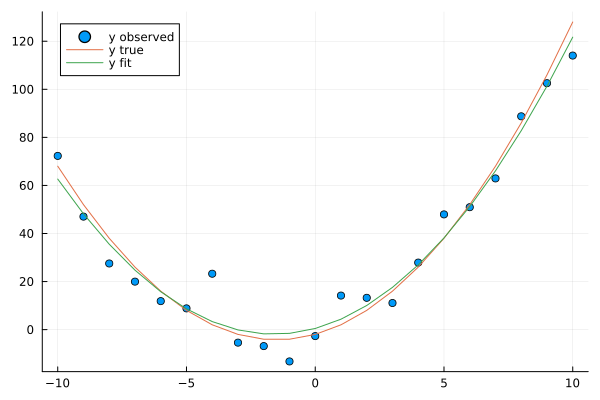

In [58]:
using Plots
using Polynomials: fit, Polynomial, coeffs
# make scatter plot of y_observed along x
scatter(x,y_observed, label="y observed")

# plot a line of y_true along x on scatter
plot!(x,y_true, label="y true")

# plot a line of fitted polynomial along x on the same plot
Polynomial([-2,3,1])
line_fit = fit(x,y_observed,2)
fit_coeff = coeffs(line_fit)
y_fitted = fit_coeff[1] .+ (fit_coeff[2] .* x) .+ (fit_coeff[3] .* (x.^2))
plot!(x,y_fitted, label="y fit")

### 2.4

1. Repeat 2.2 and 2.3 with a noise with a standard deviation of 50

In [59]:
using Random, Distributions
d1 = Normal(0,50)
noise=rand(d1,length(x))
y_observed = y_true .+ noise

21-element Vector{Float64}:
 -17.19190292844803
 101.14475233469763
 -27.08981731867354
  -1.072497487611784
  40.872757683574896
 -27.573767792158293
 127.2082083001296
 -34.026239745425414
 -81.46230175501523
  31.533660450427682
 -44.44582733964001
 -13.096641827434198
 111.2223932432263
  22.23924195727239
  27.49453482014207
  79.97218420191999
  72.02826487899114
  69.77792699877328
 122.7069215520629
  61.137954330658005
 227.17994759577422

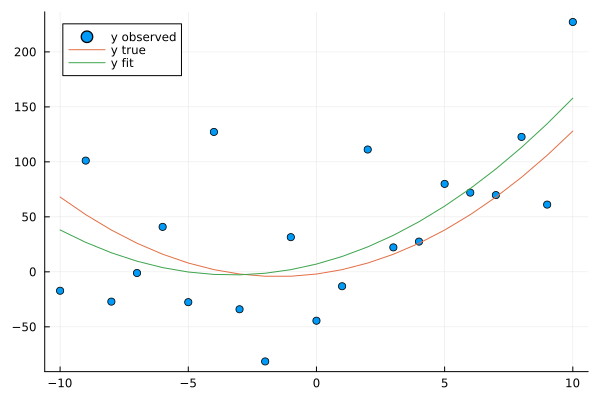

In [60]:
using Plots
using Polynomials: fit, Polynomials, coeffs
# make scatter plot of y_observed along x
scatter(x,y_observed, label="y observed")

# plot a line of y_true along x on scatter
plot!(x,y_true, label="y true")

# plot a line of fitted polynomial along x on the same plot
Polynomial([-2,3,1])
line_fit = fit(x,y_observed,2)
fit_coeff = coeffs(line_fit)
y_fitted = fit_coeff[1] .+ (fit_coeff[2] .*x) .+ (fit_coeff[3] .* x.^2)
plot!(x,y_fitted, label="y fit")

2. Compare the plot with the plot in 2.3. Is the fit closer to y_true or not, and why?

This fit is not closer to y_true. This is because the standard deviation here is 50 compared to 10 (standard deviation in 2.3). This means that more error (noise) is accounted into our fit, making it a less closer fit than when standard deviation is 10 in question 2.3 .

### 2.5

#### Repeat 2.2 and 2.3 with a tenth order polynomial fit


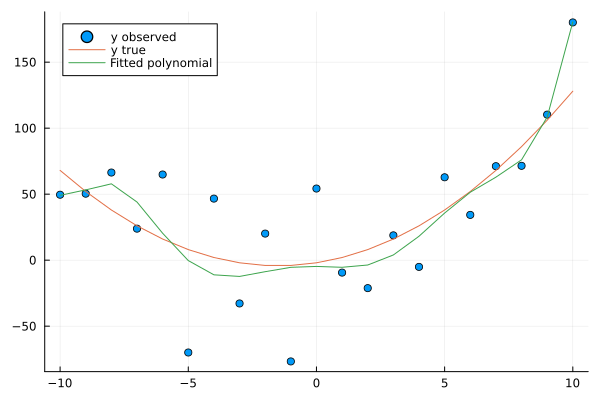

In [61]:
using Random, Distributions
d = Normal(0,10)
noise=rand(d,length(x))
y_observed = y_true .+ noise

using Plots
using Polynomials: fit, Polynomials, coeffs
# make scatter plot of y_observed along x
scatter(x,y_observed, label="y observed")

# plot a line of y_true along x on scatter
plot!(x,y_true, label="y true")

# plot a line of fitted polynomial along x on the same plot
Polynomial([-2,3,1])
line_fit = fit(x,y_observed,10)
fit_coeff = coeffs(line_fit)
y_fitted = (fit_coeff[1]) .+ (fit_coeff[2] .*x) .+ (fit_coeff[3].*x.^2) .+ (fit_coeff[4].*x.^3) .+ (fit_coeff[5].*x.^4) .+ (fit_coeff[6].*x.^5) .+ (fit_coeff[7].*x.^6) .+ (fit_coeff[8].*x.^7) .+ (fit_coeff[9] .* x.^8).+ (fit_coeff[10] .*x.^9) .+ (fit_coeff[11].* x.^10) 
plot!(x,y_fitted, label="Fitted polynomial")

This graph shows the phenomemon of overfitting.

### 2.6

1. Create a new independent parameter x_fit ranging from -11 to 11 with an increment of 0.1
2. Plot the same three plots as in 2.3 again but apply the tenth order polynomial to x_fit instead of x


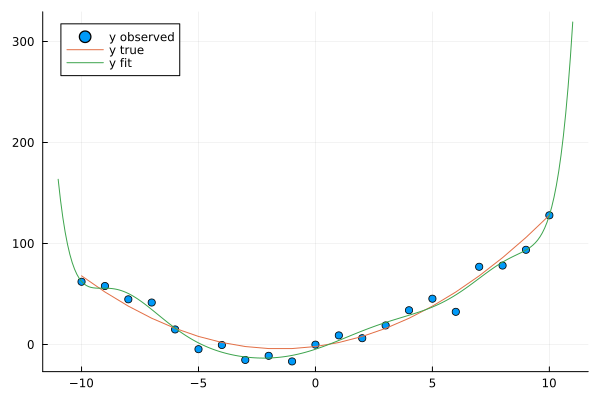

In [64]:
y_true=x.^2 .+3x .-2

using Random, Distributions
d = Normal(0,10)
noise=rand(d,length(x))
y_observed = y_true .+ noise

using Plots
using Polynomials: fit, Polynomials, coeffs

# make scatter plot of y_observed along x_fit
scatter(x,y_observed, label="y observed")

# plot a line of y_true along x_fit on scatter
plot!(x,y_true, label="y true")

x_fit=collect(-11:0.1:11)

# plot a line of fitted polynomial along x_fit on the same plot
Polynomial([-2,3,1])
line_fit = fit(x,y_observed,10)
fit_coeff = coeffs(line_fit)
y_fitted = (fit_coeff[1]) .+ (fit_coeff[2] .*x_fit) .+ (fit_coeff[3].*x_fit.^2) .+ (fit_coeff[4].*x_fit.^3) .+ (fit_coeff[5].*x_fit.^4) .+ (fit_coeff[6].*x_fit.^5) .+ (fit_coeff[7].*x_fit.^6) .+ (fit_coeff[8].*x_fit.^7) .+ (fit_coeff[9] .* x_fit.^8).+ (fit_coeff[10] .*x_fit.^9) .+ (fit_coeff[11].* x_fit.^10) 
plot!(x_fit,y_fitted, label="y fit")

3. What do you observe in the plot? What is this phenomenon called?

In this plot, we see the fitted line by passes and curves around some of of observed points , because it has recognized the noise we are applying. This phenomenon is overfitting.